# Week 3: Factory Product Planning
### Programming Exercise for IP

<font color='blue'><b>Goals of this notebook:</b></font>
Set up, solve and visualize an integer linear program with `PuLP`.

Problem description: A factory with 100 engineers and 180 technicians make products <b>A</b>, <b>B</b>, and <b>C</b>. The value of product <b>A</b> is 10'000 CHF, the value of product <b>B</b> is 12'000 CHF, and the value of product <b>C</b> is 9'000 CHF. In order to make a certain product, the factory must assign personnel to operate a workstation that produces that specific product. The following shows how many personnel of each type are required to operate a single workstation:

- workstation for product <b>A</b>: 3 engineers and 10 technicians,
- workstation for product <b>B</b>: 5 engineers and 7 technicians,
- workstation for product <b>C</b>: 2 engineers and 17 technicians.

The number of workstations of each kind are considered unlimited. Each employee can be assigned to operate at most one workstation per day, and each workstation produces exactly one product per day. As an example, if the factory wants to produce two units of product <b>A</b> on a single day, then it must assign two separate sets of personnel to two workstations for product <b>A</b>.

## Task 1: Solving the IP: Assigning Workstations

Determine how many workstations of each type the factory should operate if they want to maximize the total value of produced products in one day. To do this, write down an <b>Integer Linear Program</b>, then set it up and solve it with `PuLP`.

In [1]:
# Set up the optimization program
from pulp import *
factory_ip = LpProblem("The_Easternmost_Point_of_the_House", LpMaximize)

*Note: Recall that an integer linear program is obtained by adding integrality constraints of the form “$x \in \mathbb{Z}$” to a linear program. In `PuLP`, this is done when setting up variables. In particular, the category of your variables should be `pulp.LpInteger` in this problem.*

In [2]:
# Create the variables
a = LpVariable("setA", lowBound=0, cat='Integer')
b = LpVariable("setB", lowBound=0, cat='Integer')
c = LpVariable("setC", lowBound=0, cat='Integer')

In [3]:
# Add the objective function
factory_ip += 10000 * a + 12000 * b + 9000 * c

In [4]:
# Add the constraints
factory_ip += 3 * a + 5 * b + 2 * c <= 100
factory_ip += 10 * a + 7 * b + 17 * c <=180

In [5]:
print(factory_ip)

The_Easternmost_Point_of_the_House:
MAXIMIZE
10000*setA + 12000*setB + 9000*setC + 0
SUBJECT TO
_C1: 3 setA + 5 setB + 2 setC <= 100

_C2: 10 setA + 7 setB + 17 setC <= 180

VARIABLES
0 <= setA Integer
0 <= setB Integer
0 <= setC Integer



*Note: Although the algorithm to solve IPs is very different from LPs, you can still use the same command in `PuLP` to solve them.*

In [8]:
# Solve the IP
factory_ip.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  6 2022 

command line - cbc /var/folders/wb/nsj1jwbn6pg7v8z5l7scpkw80000gn/T/1f9afbdd119a494694970905658ddf21-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/wb/nsj1jwbn6pg7v8z5l7scpkw80000gn/T/1f9afbdd119a494694970905658ddf21-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 23 RHS
At line 26 BOUNDS
At line 30 ENDATA
Problem MODEL has 2 rows, 3 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 259310 - 0.00 seconds
Cgl0004I processed model has 2 rows, 3 columns (3 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 1000
Cbc0012I Integer solution of -240000 found by DiveCoefficient after 0 iterations and 0 nodes (0.03 seconds)
Cbc0038I Full problem 2 rows 3 columns, reduced to 2 rows 2 columns
Cbc0012I Integer solution of -

1

In [9]:
# Print the optimal value and an optimal solution
print("The factory should operate:")
for v in factory_ip.variables():
    print(f"  - {v.value():.2f} workstation {v}")
print(f"The maximized value of all products is {factory_ip.objective.value():.2f}.")

The factory should operate:
  - 5.00 workstation setA
  - 17.00 workstation setB
  - 0.00 workstation setC
The maximized value of all products is 254000.00.


## Task 2: Testing the Integrality Condition

Will the optimal solution change if the integrality condition is removed? <br>
Please change the category of the variables to continuous, and solve the problem again.

In [10]:
# Change the category of the variables to continuous, and solve the problem again
factory_lp = LpProblem("The_Easternmost_Point_of_the_House", LpMaximize)
a = LpVariable("setA", lowBound=0)
b = LpVariable("setB", lowBound=0)
c = LpVariable("setC", lowBound=0)

factory_lp += 10000 * a + 12000 * b + 9000 * c

factory_lp += 3 * a + 5 * b + 2 * c <= 100
factory_lp += 10 * a + 7 * b + 17 * c <=180

factory_lp.solve()

print("The factory should operate:")
for v in factory_lp.variables():
    print(f"  - {v.value():.2f} workstation {v}")
print(f"The maximized value of all products is {factory_ip.objective.value():.2f}.")

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  6 2022 

command line - cbc /var/folders/wb/nsj1jwbn6pg7v8z5l7scpkw80000gn/T/c6d37a2a67454aa695fc6e3b7586108e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/wb/nsj1jwbn6pg7v8z5l7scpkw80000gn/T/c6d37a2a67454aa695fc6e3b7586108e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 17 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 2 rows, 3 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
0  Obj -0 Dual inf 37666.667 (3)
0  Obj -0 Dual inf 37666.667 (3)
2  Obj 259310.34
Optimal - objective value 259310.34
Optimal objective 259310.3448 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

The factory should operate:
  - 6.90 workst

## Task 3: Solving the IP: Additional Workers

Now, we consider a new problem based on the optimal amount of workstations you found above. The factory owner needs to hire another group of engineers and technicians to perform maintenance work, and they ask us again for our help. Here is what they need:

- Each workstation needs at least 1 **engineer** and 1 **technician** to maintain. 
- Each **technician** can work on 3 workstations of any type at the same time.
- Each **engineer** can work on 1 workstation A, 2 workstation B, and 3 workstation C simultaneously.
- The salary of an **engineer** is 8'000 CHF, while that of a **technician** is 6'000 CHF. 

Your task is to write an integer linear program to determine how many engineers and technicians to hire so that they can service all the workstations from Task 1 and that the total salary is minimized. Note that the optimal solution from Task 1 is to operate 5 workstation A, 17 workstation B, and no workstation C.

In [11]:
# Write an IP to model and solve this problem
worker_ip = LpProblem("Additional_Workers", LpMinimize)
num_t = LpVariable("technician number", lowBound=0, cat='Integer')
num_e = LpVariable("engineer number", lowBound=0, cat='Integer')

worker_ip += 8000 * num_e + 6000 * num_t

worker_ip += num_t >= 17
worker_ip += num_e >= 5
worker_ip += num_e * 2 >= 17

worker_ip.solve()

print("The factory should operate:")
for v in worker_ip.variables():
    print(f"  - {v.value():.2f} workstation {v}")
print(f"The minimize value of all products is {worker_ip.objective.value():.2f}.")


Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  6 2022 

command line - cbc /var/folders/wb/nsj1jwbn6pg7v8z5l7scpkw80000gn/T/3d8461e94c1c41658baf7c2e28792e51-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/wb/nsj1jwbn6pg7v8z5l7scpkw80000gn/T/3d8461e94c1c41658baf7c2e28792e51-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 18 RHS
At line 22 BOUNDS
At line 25 ENDATA
Problem MODEL has 3 rows, 2 columns and 3 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 170000 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 174000 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and crea

Sketching out the feasible region is often helpful when solving a mathematical program. To improve our efficiency, we have built a function in `plotLP.py` that can generate such plots automatically. Please download the file from Moodle and save it in the same directory of this workbook. Once you have set up the LP or the IP in PuLP, you can visualize it using the code below.

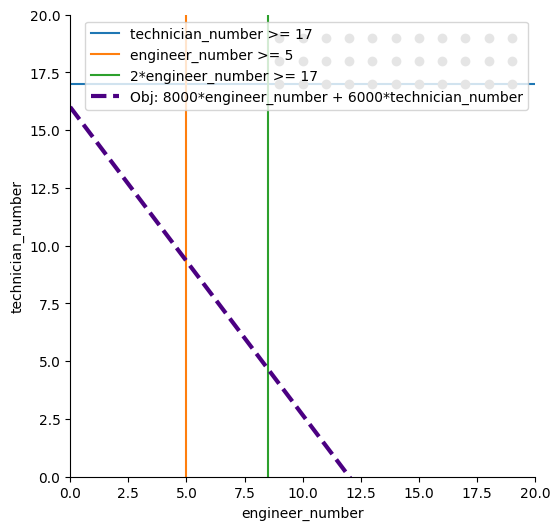

In [14]:
# Draw the feasible region of the above program
# make sure you have saved plotLP.py in the same directory on your computer
%matplotlib inline
from plotLP import plotLP  
plotLP(worker_ip, x_lower=0, x_upper=20, y_lower=0, y_upper=20,
       draw_obj=True, show_feasible=True, int_prog=True, 
       grid_pts=200, fig_size=(6,6))

Below is a description of all arguments in the function `plotLP`:
- `LP`: An LP object from PuLP that you would like to visualize.
- `x_lower`: The lowest value of x to show in the graph.
- `x_upper`: The highest value of x to show in the graph.
- `y_lower`: The lowest value of y to show in the graph.
- `y_upper`: The highest value of y to show in the graph.
- `draw_obj`: A boolean indicating whether to draw the objective function. The default value is `True`.
- `show_feasible`: A boolean indicating whether to show the feasible region. The default value is `True`.
- `int_prog`: A boolean indicating whether to treat the LP as an integer LP. The default value is `False`.
- `grid_pts`: An integer representing the discretized number of points in the xy-grid for continuous variables. The default value is `200`.
- `fig_size`: A tuple of integers specifying the size of the plot. The default value is `(6,6)`.

You can play around with these arguments, use the function to visualize other LPs, or even check your homework by graphing it out. Have fun!